##**Predicting heart disease using machine learning**

This notebook looks into using Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of `predicting whether or not someone has heart disease based on their medical attributes`.

**We're going to take following approach:**

1.   Problem definition
2.   Data
3.   Evaluation
4.   Features
5.   Modelling
6.   Experimentation



**1. Problem Definition**

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

**2. Data**

The original data came from the Cleavland data from the UCI Machine Learning Repository.

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

**3. Evaluation**

>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

**4. Features**

   **Create a data dictionary:**


* `age` : 
  age in years

* `sex` :
  gender (1 = male; 0 = female) 

* `cp` :
  chest pain type

   *   0: Typical angina: chest pain related decrease blood supply to the heart
   *   1: Atypical angina: chest pain not related to heart
   *   2: Non-anginal pain: typically esophageal spasms (non heart related)
   *  3: Asysmptomatic: chest pain not showing signs of disease



* `trestbps` :
  resting blood pressure (*anything above 130-140 is typically cause of concern*)

* `chol` :
  cholesterol measure (*above 200 is cause of concern*)

* `fbs` :
  fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (*'>126' mg/dl signals dibetes*)

* `restecg` :
  ecg observation at resting condition

 *   0: Nothing to note
 *   1: ST-T Wave abnormality
 *   2: Possible or definite left ventricular hypertrophy



* `thalch` :
  maximum heart rate achieved

* `exang` :
  exercise induced angina (1 = yes; 0 = no)

* `oldpeak` :
  ST depression induced by exercise  relative to rest

* `slope` :
the slope of the peak exercise ST segment
 * 0: Upsloping: better heart rate with excercise (uncommon)
 * 1: Flatsloping: minimal change (typical healthy heart)
 * 2: Downslopins: signs of unhealthy heart

* `ca` :
number of major vessels (0-3) colored by flourosopy

* `thal` :
thal

* `target` :
[0=no heart disease; 1 = yes]

## Preparing the tools

We're going to use pandas, matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

**Load data**

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ml_project_1/heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.



1.   What questions are you trying to solve?
2.   What kind of the data do we have and how do we treat different types?
3.  What's missing from the data and how do you deal with it?
4.  Where are the outliers and why should you care about them?
5.  How can you add, change or remove features to get more out of your data?



In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# Let's find out how many of each class there are
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

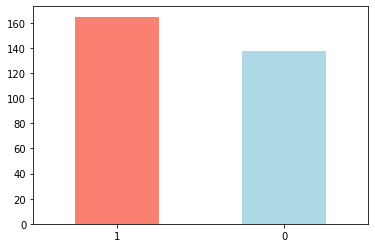

In [7]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=0);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Heart Disease Frequency according to Sex**

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [13]:
round((pd.crosstab(df.target, df.sex)/ np.array(df.sex.value_counts().iloc[::-1])) *100, 6)

sex,0,1
target,,
0,25.0,55.072464
1,75.0,44.927536


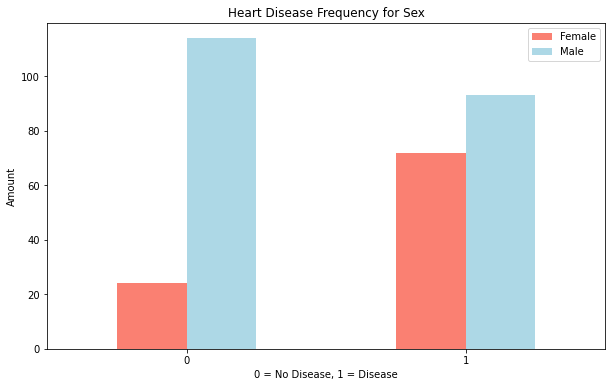

In [14]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()

**Age vs. Max Heart Rate (thalach) for Heart Disease**

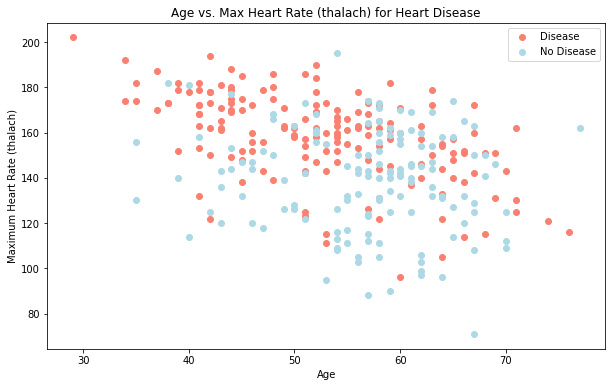

In [15]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon",
            marker="o")


# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue",
            marker="o");

# Add some helpful info
plt.title("Age vs. Max Heart Rate (thalach) for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(["Disease", "No Disease"]);


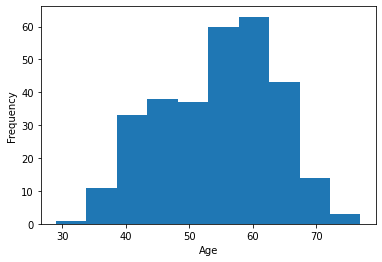

In [16]:
# Check the distribution of the age column with a histogram
df.age.plot.hist()
plt.xlabel("Age");

**Heart Disease Frequency Per Chest Pain Type**

* `cp` :
  chest pain type

   *   0: Typical angina: chest pain related decrease blood supply to the heart
   *   1: Atypical angina: chest pain not related to heart
   *   2: Non-anginal pain: typically esophageal spasms (non heart related)
   *  3: Asysmptomatic: chest pain not showing signs of disease


In [17]:
pd.crosstab(df.target, df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


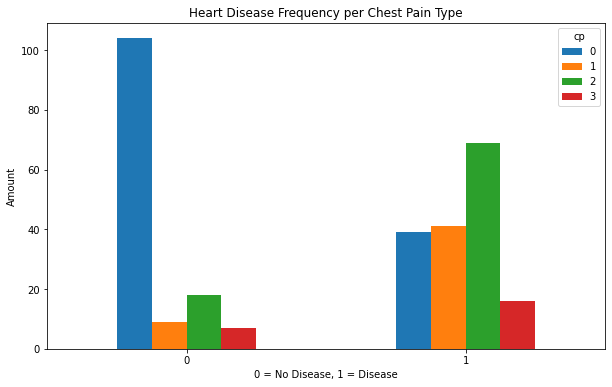

In [18]:
# Make the crosstab more visual
pd.crosstab(df.target, df.cp).plot(kind="bar",
                                   figsize=(10, 6))

# Add some communication
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0);

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


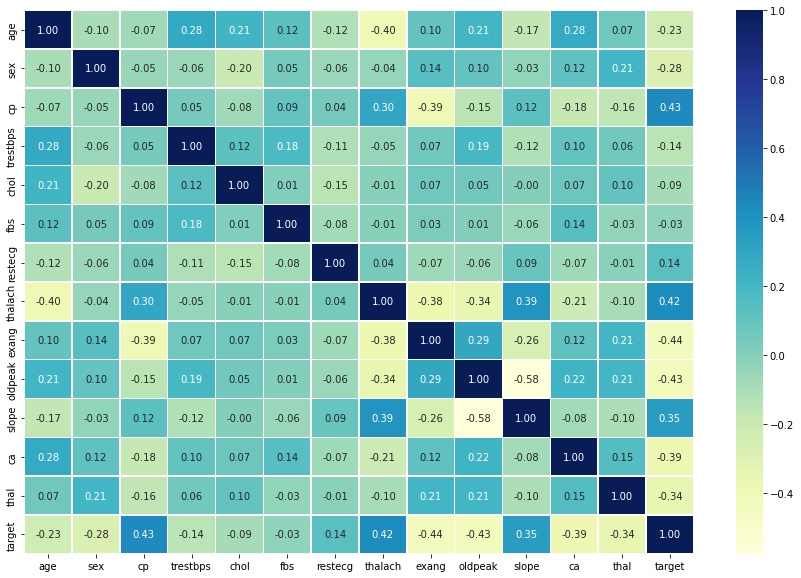

In [21]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5 )                

**5. Modelling**

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [24]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [27]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [28]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

*Now we've got our data split into training and test sets, it's time to build a mchine learning model.*

*We'll train it (find the patterns) on the training set.*

*And we'll test it (use the patterns) on the test set.*

**We're going to try 3 diffrent machine learning model:**

1.   Logistic Regression
2.   K-Nearest Neighbors Classifier
3.   Random Forest Classifier



In [29]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluates given machine learning models.
  models  : a dict of different Scikit-Learn machine learning models
  X_train : training data (no labels)
  X_test  : testing data (no labels)
  y_train : training labels
  y_test  : testing labels
  """
  # Set random seed
  np.random.seed(42)
  # Make a dictionary to keep models scores
  model_scores = {}
  # Loop through models
  for name, model in models.items():
    # Fit the model to the data
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)
  return model_scores 

In [30]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Model Comparison**

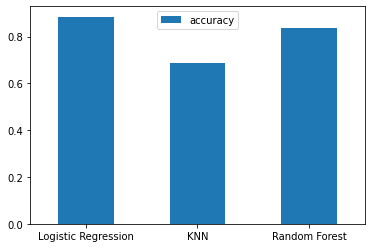

In [31]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar()
plt.xticks(rotation=0);

**Now we've got a baseline model... and we know a model's first predictions aren't always what we should based our next steps off. What should do?**

Let's look at the following:

1.   Hyperparameter tuning
2.   Feature importance
3.   Confusion Matrix
4.   Cross-validation
5.   Precision
6.   Recall
7.   F1 score
8.   Classification report
9.   ROC curve
10.  Area under the curve (AUC)


**Hyperparameter Tuning (by hand)**

In [32]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values of n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
  knn.set_params(n_neighbors=i)

  # Fit the algorithm
  knn.fit(X_train, y_train)

  # Update the training score list
  train_scores.append(knn.score(X_train, y_train))

  # Update the test score list
  test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


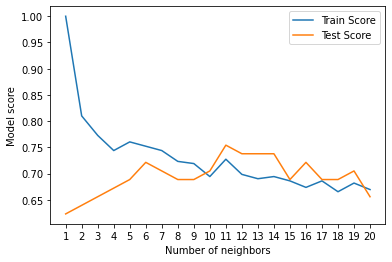

In [33]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend();

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

**Hyperparameter Tuning with RandomizedSearchCV**

We're going to tune:

*   LogisticRegression()
*   RandomForestClassifier()

... using RandomizedSearchCV



In [34]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(start=-4, stop=4, num=20, base=10.0),
                "solver": ["liblinear"]} # C : level of regularization 

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV...

In [35]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=False)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train);

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(),   let's do the same for RandomForestClassifier()...

In [38]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=False)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train);

In [39]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [40]:
# Evaluate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

**Hyperparameter Tuning with GridSearchCV**

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV...

In [41]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=False)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

In [42]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [43]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

**Evaluating our tuned machine learning classifier, beyond accuracy

*   ROC curve and AUC score
*   Confusion matrix
*   Classification report
*   Precision
*   Recall
*   F1-score

... and it would be great if cross-validation was used where possible.


To make comparison and evaluate our trained model, first we need to make predictions.


In [44]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [45]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [46]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


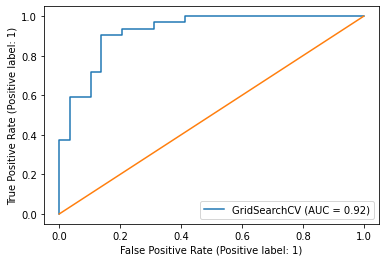

In [47]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
plt.plot([0, 1], [0, 1]);

In [48]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_preds)
print(cf_matrix)

[[25  4]
 [ 3 29]]


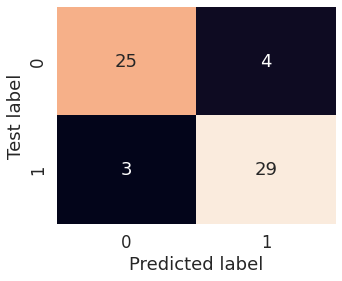

In [49]:
sns.set_theme(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):
  """
  Plots a nice looking confusion matrix using Seaborn's heatmap()
  """
  fig, ax = plt.subplots(figsize=(5, 4))
  ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
  plt.xlabel("Predicted label")
  plt.ylabel("Test label")

plot_conf_mat(y_test, y_preds)

Now we've got a `ROC curve`, an `AUC metric` and a `confusion matrix`, let's get a `classification report` as well as cross-validated `precision`, `recall` and `f1-score`.

In [50]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Calculate evaluation metrics using cross-validation**

We're going to calculate `accuracy`, `precision`, `recall` and `f1-score` of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [51]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [52]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [53]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [54]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [55]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [56]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [57]:
cv_metrics =  {"Accuracy": cv_acc,
              "Precision": cv_precision,
              "Recall": cv_recall,
              "F1-score": cv_f1}

In [58]:
# Visualize our cross-validated metrics
cv_metrics = pd.DataFrame(cv_metrics, index=["Score"])
cv_metrics

,Accuracy,Precision,Recall,F1-score
Score,0.844699,0.820794,0.921212,0.867301


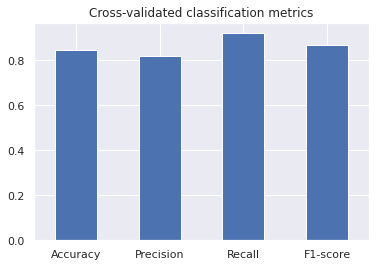

In [83]:
# Set font size
sns.set_theme(font_scale=1)

# bar plot using matplotlib
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False)
plt.xticks(rotation=0);

**Feature Importance**

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model.

Let's find the feature importance for our LogisticRegression model..

In [103]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [109]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062049,  0.66001432, -0.01155971, -0.00166496,
         0.04017236,  0.31603405,  0.02458922, -0.60470171, -0.56795456,
         0.45085392, -0.63733328, -0.67555094]])

In [110]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076883508599633,
 'sex': -0.8606204883695241,
 'cp': 0.660014324982524,
 'trestbps': -0.01155970600550047,
 'chol': -0.0016649614843449207,
 'fbs': 0.040172360271308105,
 'restecg': 0.31603405294617176,
 'thalach': 0.02458922341328129,
 'exang': -0.604701713592625,
 'oldpeak': -0.5679545646616215,
 'slope': 0.4508539209693025,
 'ca': -0.6373332766360461,
 'thal': -0.6755509369619848}

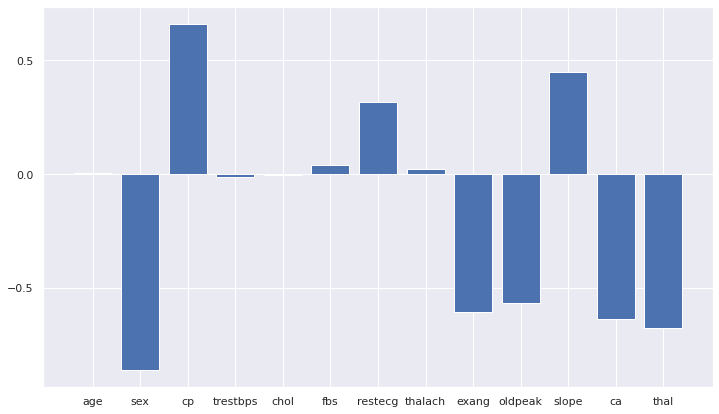

In [145]:
# Visualize feature importance
sns.set_theme(font_scale=1)
feature_df = pd.DataFrame(feature_dict, index=["coef"])
fig, ax = plt.subplots(figsize=(12,7))
ax.bar(feature_df.columns, feature_df.loc["coef"])
plt.yticks([-0.5, 0, 0.5]);

In [146]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [149]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


**6. Experiments**

If you haven't hit your evaluation metric yet... ask yourself...

*   Could you collect more data?
*   Could you try better model? Like `CatBoost` or `XGBoost`?
*   Could you improve the current models? (beyond what we've have done so far)
*   If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?



